Created by Shaokang Li

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np
import bqplot
import ipywidgets as widgets
import PIL.Image as Image
from ipywidgets import interact, interactive, fixed, interact_manual

The name of the dataset is monroe-county-crash-data2003-to-2015, it is a data set about all car accident happened in Bloomington between year 2003 and 2015. I got this data from data.gov official website, the url is: https://catalog.data.gov/dataset/traffic-data. The url for this file is: https://data.bloomington.in.gov/dataset/117733fb-31cb-480a-8b30-fbf425a690cd/resource/d5ba88f9-5798-46cd-888a-189eb59f7b46/download/traffic-counts2013-2015.csv. The license for this file is under a Creative Commons Attribution [version 4.0] License, which means that user could copy and redistribute this data in any medium or format and transform and build upon the data for any purpose. The data file is about 6391 KB and there are 53943 rows and 12 columns in the dataset. 

In [40]:
data = pd.read_csv('monroe-county-crash-data2003-to-2015.csv', encoding= 'unicode_escape')
data

Master Record Number  Year  Month  Day Weekend?    Hour Collision Type  \
0                 902363382  2015      1    5  Weekday     0.0          2-Car   
1                 902364268  2015      1    6  Weekday  1500.0          2-Car   
2                 902364412  2015      1    6  Weekend  2300.0          2-Car   
3                 902364551  2015      1    7  Weekend   900.0          2-Car   
4                 902364615  2015      1    7  Weekend  1100.0          2-Car   
...                     ...   ...    ...  ...      ...     ...            ...   
53938             900084526  2003     10    6  Weekday  1700.0          2-Car   
53939             900089213  2003     11    3  Weekday   800.0          1-Car   
53940             900095322  2003     12    5  Weekday  1200.0          2-Car   
53941             900099922  2003     12    1  Weekend   700.0          2-Car   
53942             900109291  2003     12    7  Weekend  1700.0          2-Car   

              Injury Type                         Primary Factor  \
0       No injury/unknown  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   
1       No injury/unknown                  FOLLOWING TOO CLOSELY   
2      Non-incapacitating              DISREGARD SIGNAL/REG SIGN   
3      Non-incapacitating          FAILURE TO YIELD RIGHT OF WAY   
4       No injury/unknown          FAILURE TO YIELD RIGHT OF WAY   
...                   ...                                    ...   
53938   No injury/unknown                    IMPROPER LANE USAGE   
53939   No injury/unknown                           UNSAFE SPEED   
53940   No injury/unknown             BRAKE FAILURE OR DEFECTIVE   
53941   No injury/unknown                         UNSAFE BACKING   
53942  Non-incapacitating  OTHER (DRIVER) - EXPLAIN IN NARRATIVE   

           Reported_Location   Latitude  Longitude  
0                 1ST & FESS  39.159207 -86.525874  
1              2ND & COLLEGE  39.161440 -86.534848  
2      BASSWOOD & BLOOMFIELD  39.149780 -86.568890  
3             GATES & JACOBS  39.165655 -86.575956  
4                      W 3RD  39.164848 -86.579625  
...                      ...        ...        ...  
53938  DUNN & WHITE LOT WEST   0.000000   0.000000  
53939        RED OAK & SR446   0.000000   0.000000  
53940        2ND ST & WALNUT   0.000000   0.000000  
53941         NINETH & NORTH   0.000000   0.000000  
53942      MONROW & THIRD ST   0.000000   0.000000  

[53943 rows x 12 columns]

This is a dataset about car accidents reported in Monroe County, Bloomington, Indiana, from year 2003 to 2015. The dataset recorded the time, location, collision type, injure type, and primary factor of each accident. There are also master record number, reported location, latitude and longitude in the file, but they are not useful to create graphs. The master record number, year, date, month, hour, latitude and longitude fields are numerical type and weekend, collision type, injury type, primary factor and reported location fields are object type. The data is already in a clean shape, which means there is no redundant data or NAN value. The year, month and day is recoded separately, so I create a new column called date to store the value that combined year, month and day, in the form of 'month-day-year'. I also change the hour number in the scale of 24 in order to plot graphs.

In [41]:
data["Hour"] = data["Hour"] / 100

In [42]:
data["Date"] = data["Month"].astype(str) +'-'+ data["Day"].astype(str)+'-'+data["Year"].astype(str)

In [43]:
data['Date'] =pd.to_datetime(data.Date)

In [44]:
mySelectedLabel = ipywidgets.Label()

In [45]:
agg = data['Year'].value_counts()

In [46]:
agg2 = agg.sort_index()

In [47]:
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

ax_x = bqplot.Axis(scale = x_sc, label = 'Year')
ax_y = bqplot.Axis(scale = y_sc, orientation='vertical', label = 'Total number of accidents')

line_plot = bqplot.Lines(x = agg2.index,
                         y = agg2.values,
                         line_style = 'solid',
                         marker = 'circle',
                         marker_size = 48,
                         scales = { 'y':y_sc, 'x':x_sc},
                         interactions={'click': 'select'}, 
                         colors = ['darkgreen'])

selector = bqplot.interacts.IndexSelector(scale = x_sc, marks = [line_plot])

In [48]:
#bar graph
filter_data = data[data['Year'] == 2004]

date_group = filter_data['Date'].value_counts()
sorted_data_group = date_group.sort_index()

x_scb = bqplot.DateScale()
y_scb = bqplot.LinearScale()

ax_xh = bqplot.Axis(scale = x_scb, label = 'Date(by month at that year)')
ax_yh = bqplot.Axis(scale = y_scb, orientation = 'vertical', label = 'Number of accidents')

bars = bqplot.Bars(x = sorted_data_group.index, y = sorted_data_group.values, scales = { 'y':y_scb, 'x':x_scb}, colors = ['lightseagreen'])

In [49]:
def get_data_value(change):
    index = change['owner'].selected
    year = agg2.index[index]
    
    mySelectedLabel.value = str(int(agg2.values[index])) + ' Number of accidents happened in year ' + str(year[0])
    
    mask_name = []
    
    for i in range(len(data['Year'])):
        mask_name.append(year[0])
    
    mask = (data['Year'] == mask_name)
    filter_data = data[mask]
    
    date_group = filter_data['Date'].value_counts()
    sorted_data_group = date_group.sort_index()
    
    bars.x = sorted_data_group.index
    bars.y = sorted_data_group.values
    
line_plot.observe(get_data_value, 'selected')

In [50]:
fig_line = bqplot.Figure(marks = [line_plot], axes=[ ax_x, ax_y], interaction = selector)
fig_bar = bqplot.Figure(marks = [bars], axes = [ax_xh, ax_yh])

This dashboard shows an interactive relationship between how accidents data look like in a scale from 2003 to 2015 and how data look like in each year. The graph above show how many accidents happened in Bloomington each year. This two graphs are interactive, so you could click on the first graph and then move the mouse to change the year using the red line pops up on top of this graph. If you want to fix line, just click again to stop the line from moving. The graph below shows how many accidents happened in each month of the year that you choose on the graph above. This graph is not showing the total number of accidents happened that month, but about quarter of a month, so user can see a pattern of how many accidents happened trough that month as well. As you move the mouse on the top graph you could also see the exact number of accident and the year you are at when moving the mouse. 

In [59]:
fig_line.layout.min_width='500px'
fig_bar.layout.min_width='500px'

myDashboard = ipywidgets.VBox([mySelectedLabel, ipywidgets.VBox([fig_line,fig_bar])])
myDashboard

This interactive dashboard allows you to change the attribute on the x axis and the dashboard will show you how many records is in the dataset group by the attribute you selected. The year changes by an interval of one and you can simply click on the radio button to change attribute. For example, if you selected weekend, and year 2003. The dashboard will tell you how many accidents happened in weekday and how many in weekend in that year.

In [52]:
x_axis = widgets.RadioButtons(
    options=['Month','Weekend?', 'Collision Type', 'Injury Type', 'Hour' ],
    description='Group by:',
    disabled=False
)

year_axis = widgets.IntSlider(
    value=2003,
    min=2003,
    max=2015,
    step=1,
    description='At year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

ui = widgets.HBox([x_axis, year_axis])

def bar(x, year):
    plt.figure(figsize=(15, 15))
    year_data = data[data['Year'] == year]
    plt_data = year_data[x].value_counts()
    plt.bar(plt_data.index, plt_data.values, color=['darkred', 'darkblue', 'purple', 'forestgreen', 'darkorange', 'chocolate'])
    plt.show

out = widgets.interactive_output(bar, {'x': x_axis, 'year': year_axis})

display(ui, out)

Output()

This scatter plot shows if there is data related to a combination of attributes. It is like the plot above, so you can click on the radio button to change which variable you want on that axis. This dashboard is to see if there is data recorded with condition x and y together. For example, if users want to see what injure happened on weekend or on weekdays, they can choose weekend and injure type attribute. If there is a dot on No injury and weekend, it means that there is at least one accident happened during weekend and it does not have any injuries.

In [53]:
x_axis = widgets.RadioButtons(
    options=['Month', 'Weekend?', 'Collision Type' ],
    description='X:',
    disabled=False
)

y_axis = widgets.RadioButtons(
    options=['Month','Weekend?', 'Injury Type', 'Primary Factor' ],
    description='Y:',
    disabled=False
)

ui = widgets.HBox([x_axis, y_axis])

def scatter(x, y):
    plt.figure(figsize=(15, 15))
    d1 = data[x]
    d2 = data[y]
    plt.scatter(d1.values.astype('str'), d2.values.astype('str'))
    plt.show

out = widgets.interactive_output(scatter, {'x': x_axis, 'y': y_axis})

display(ui, out)

Output()

These two images below are visualization of the car accidents happened in Chicago. The dataset is about car accidents happened in Chicago from around 2016 to 2020. I got this data from https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if. The dashboard below are created by a platform called Chicago Data Portal. The URL for this dashboard is https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes-Dashboard/8tdq-a5dp

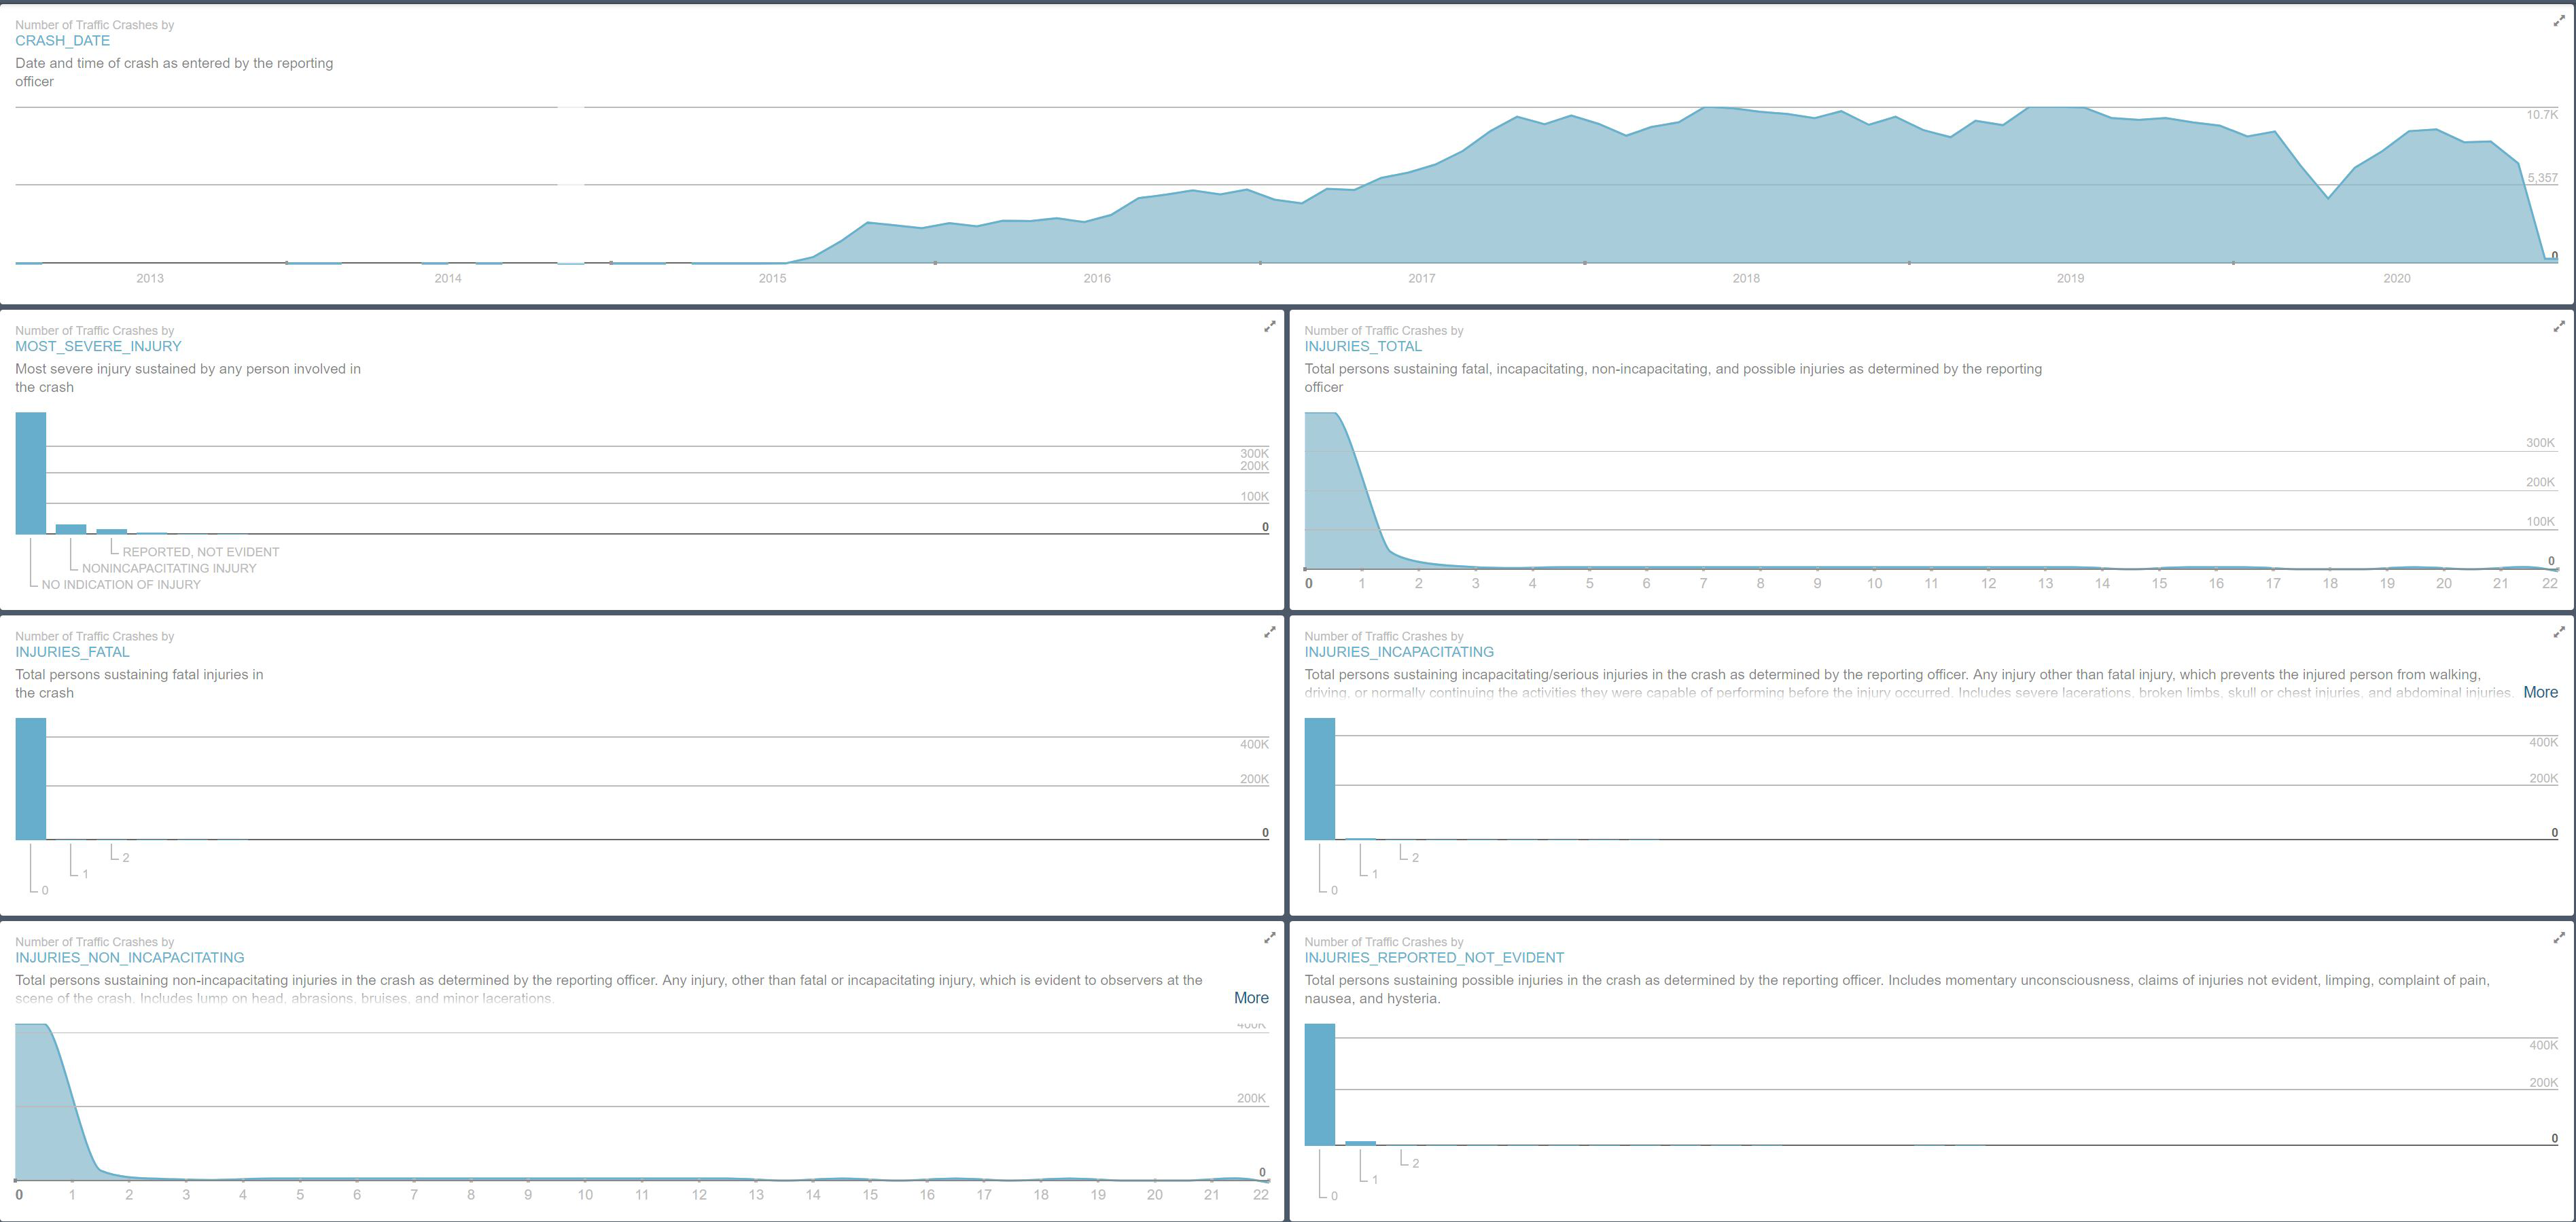

In [54]:
im1 = Image.open('1.JPG')
im1

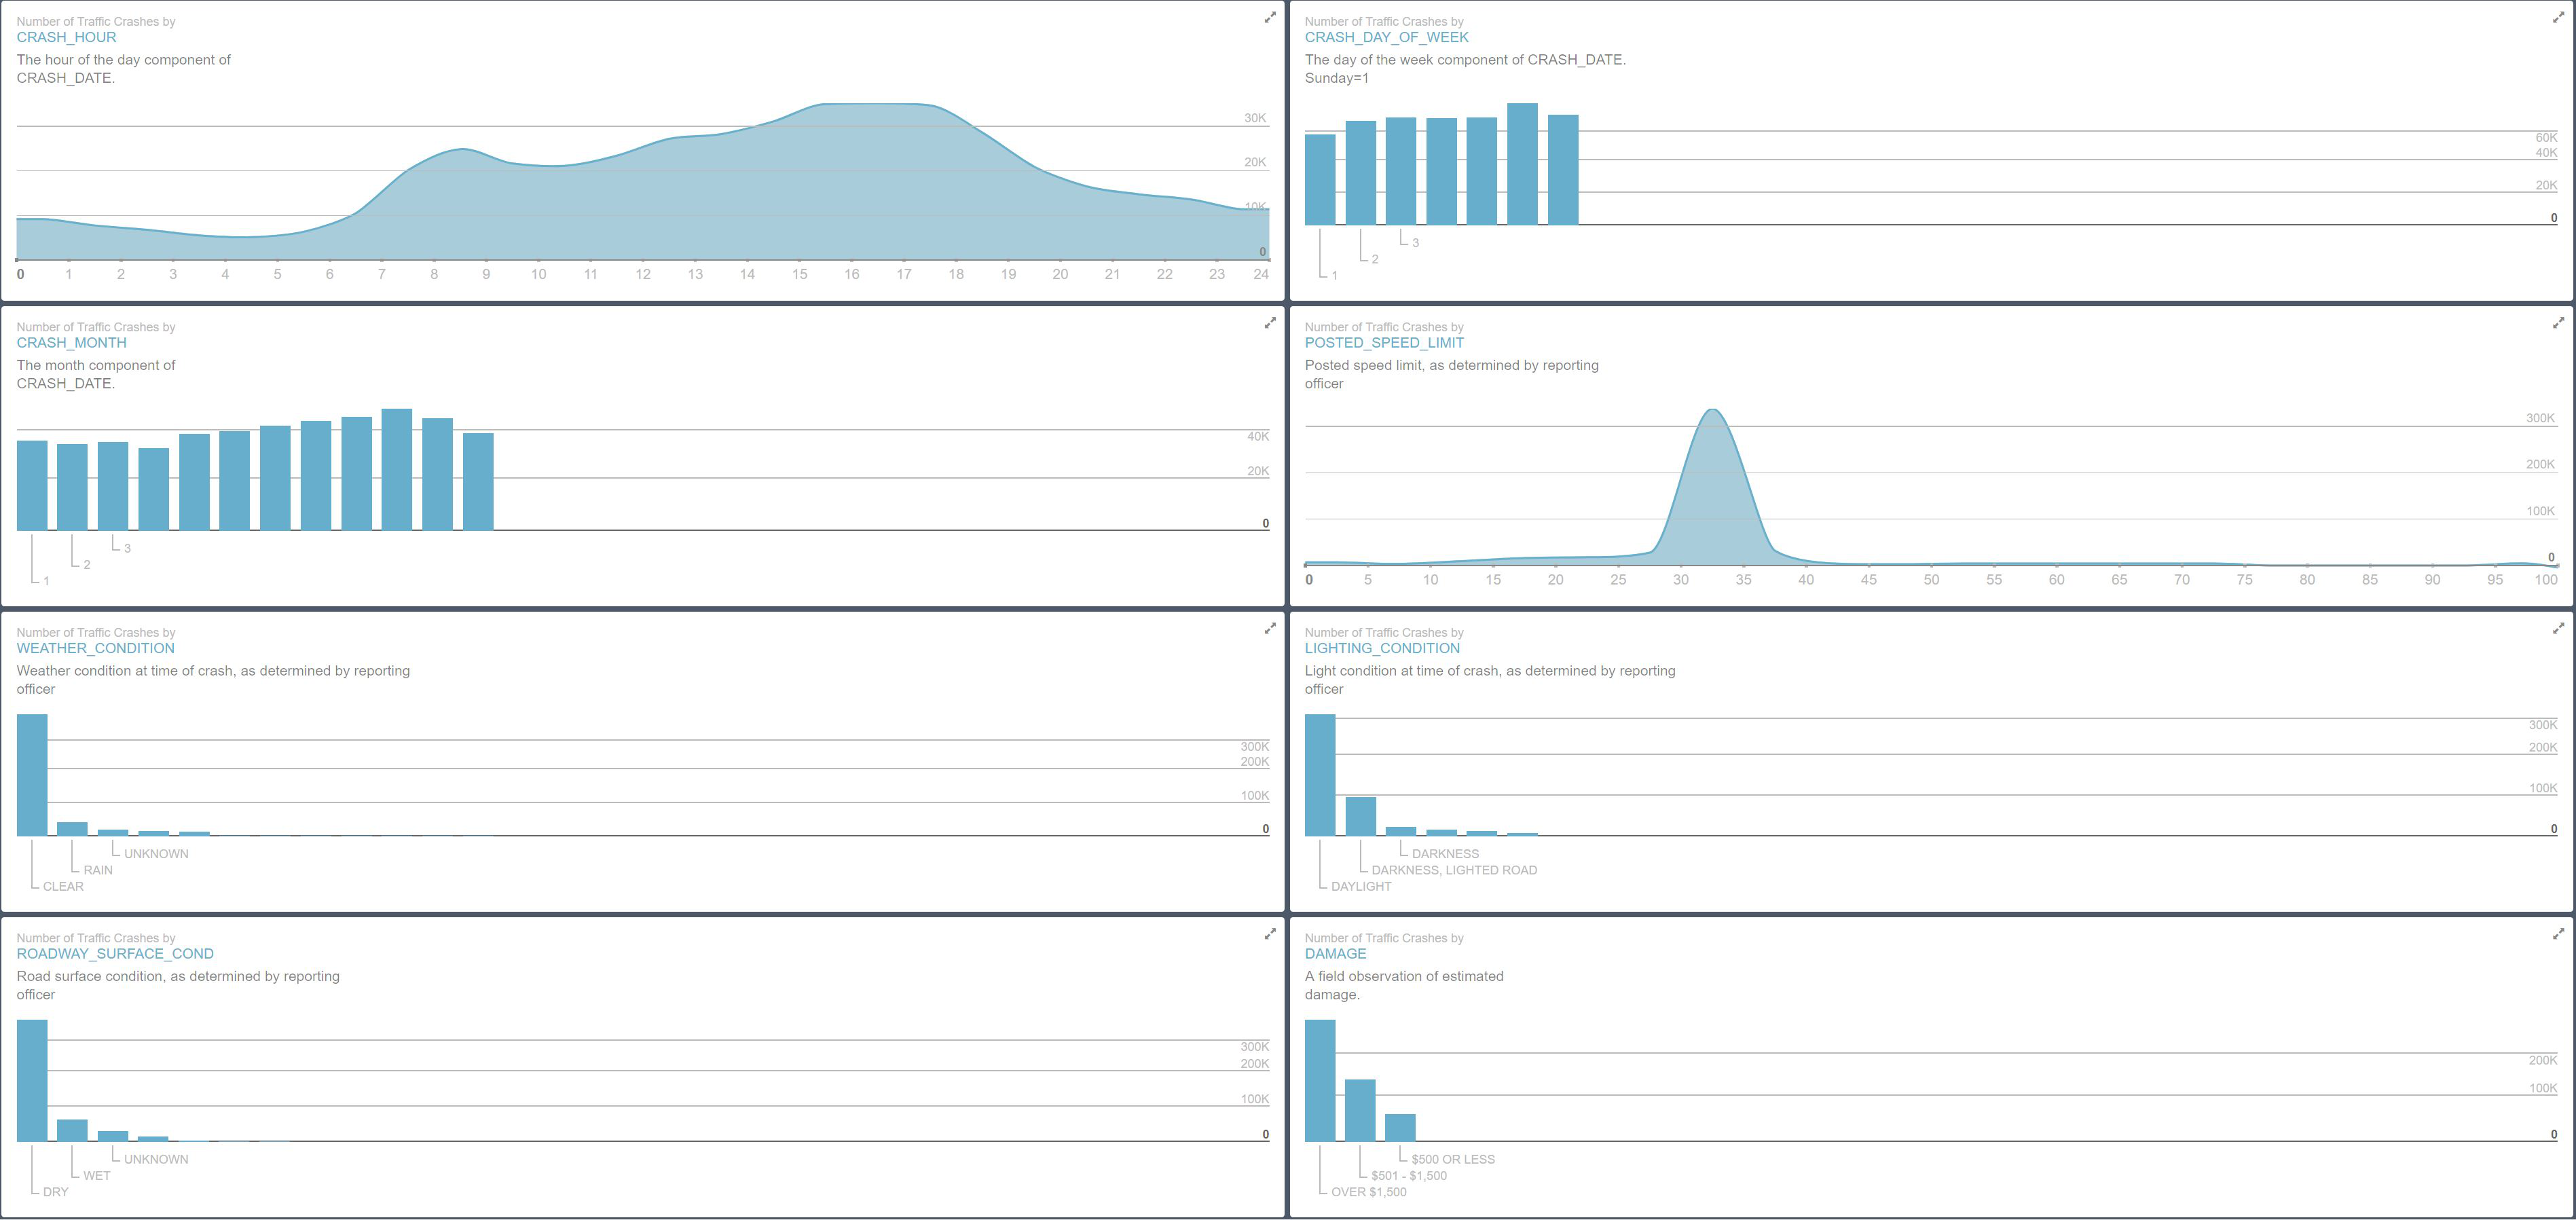

In [55]:
im2 = Image.open('2.JPG')
im2

The three images below shows the accident data in Indiana from year 2017 to 2019. This visualiztion is created by Nikhil Viswanath and it is published on an online platform called Tableau Public on Nov 25, 2020. The URL for this visualization is https://public.tableau.com/profile/iamnikhilv#!/vizhome/TableauFinalProject_16063655272940/Overview.

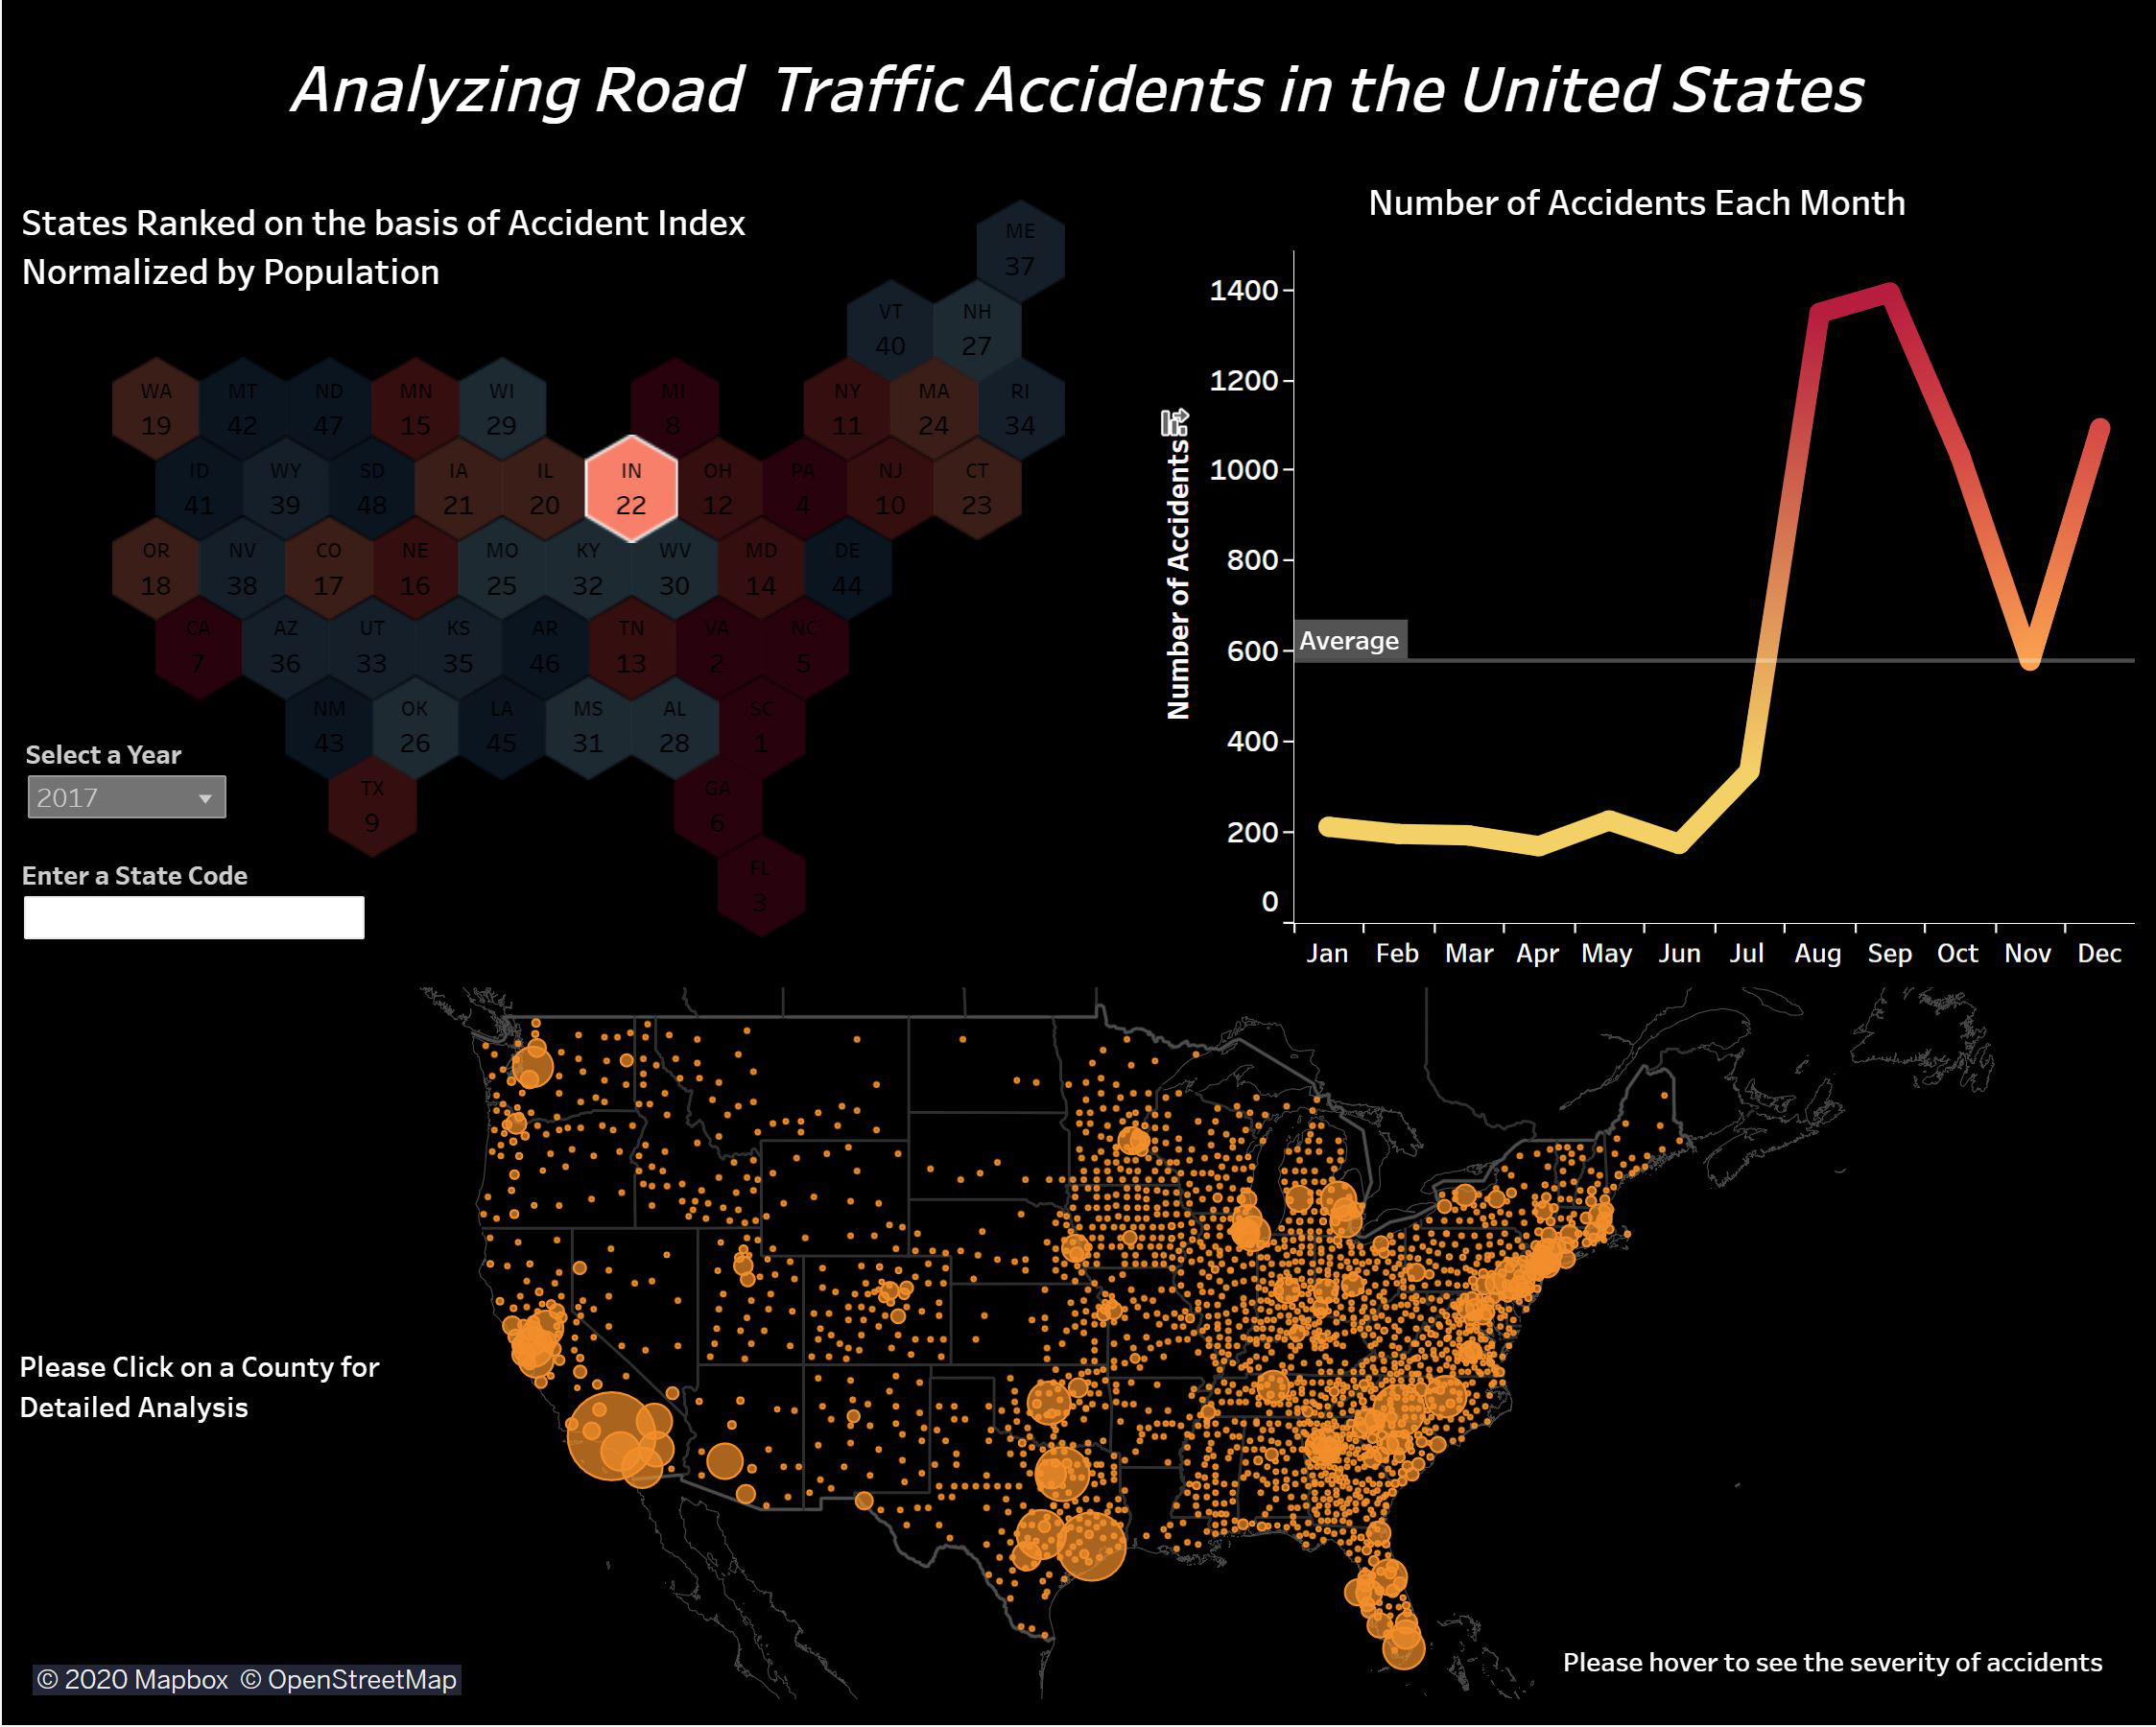

In [56]:
im3 = Image.open('3.JPG')
im3

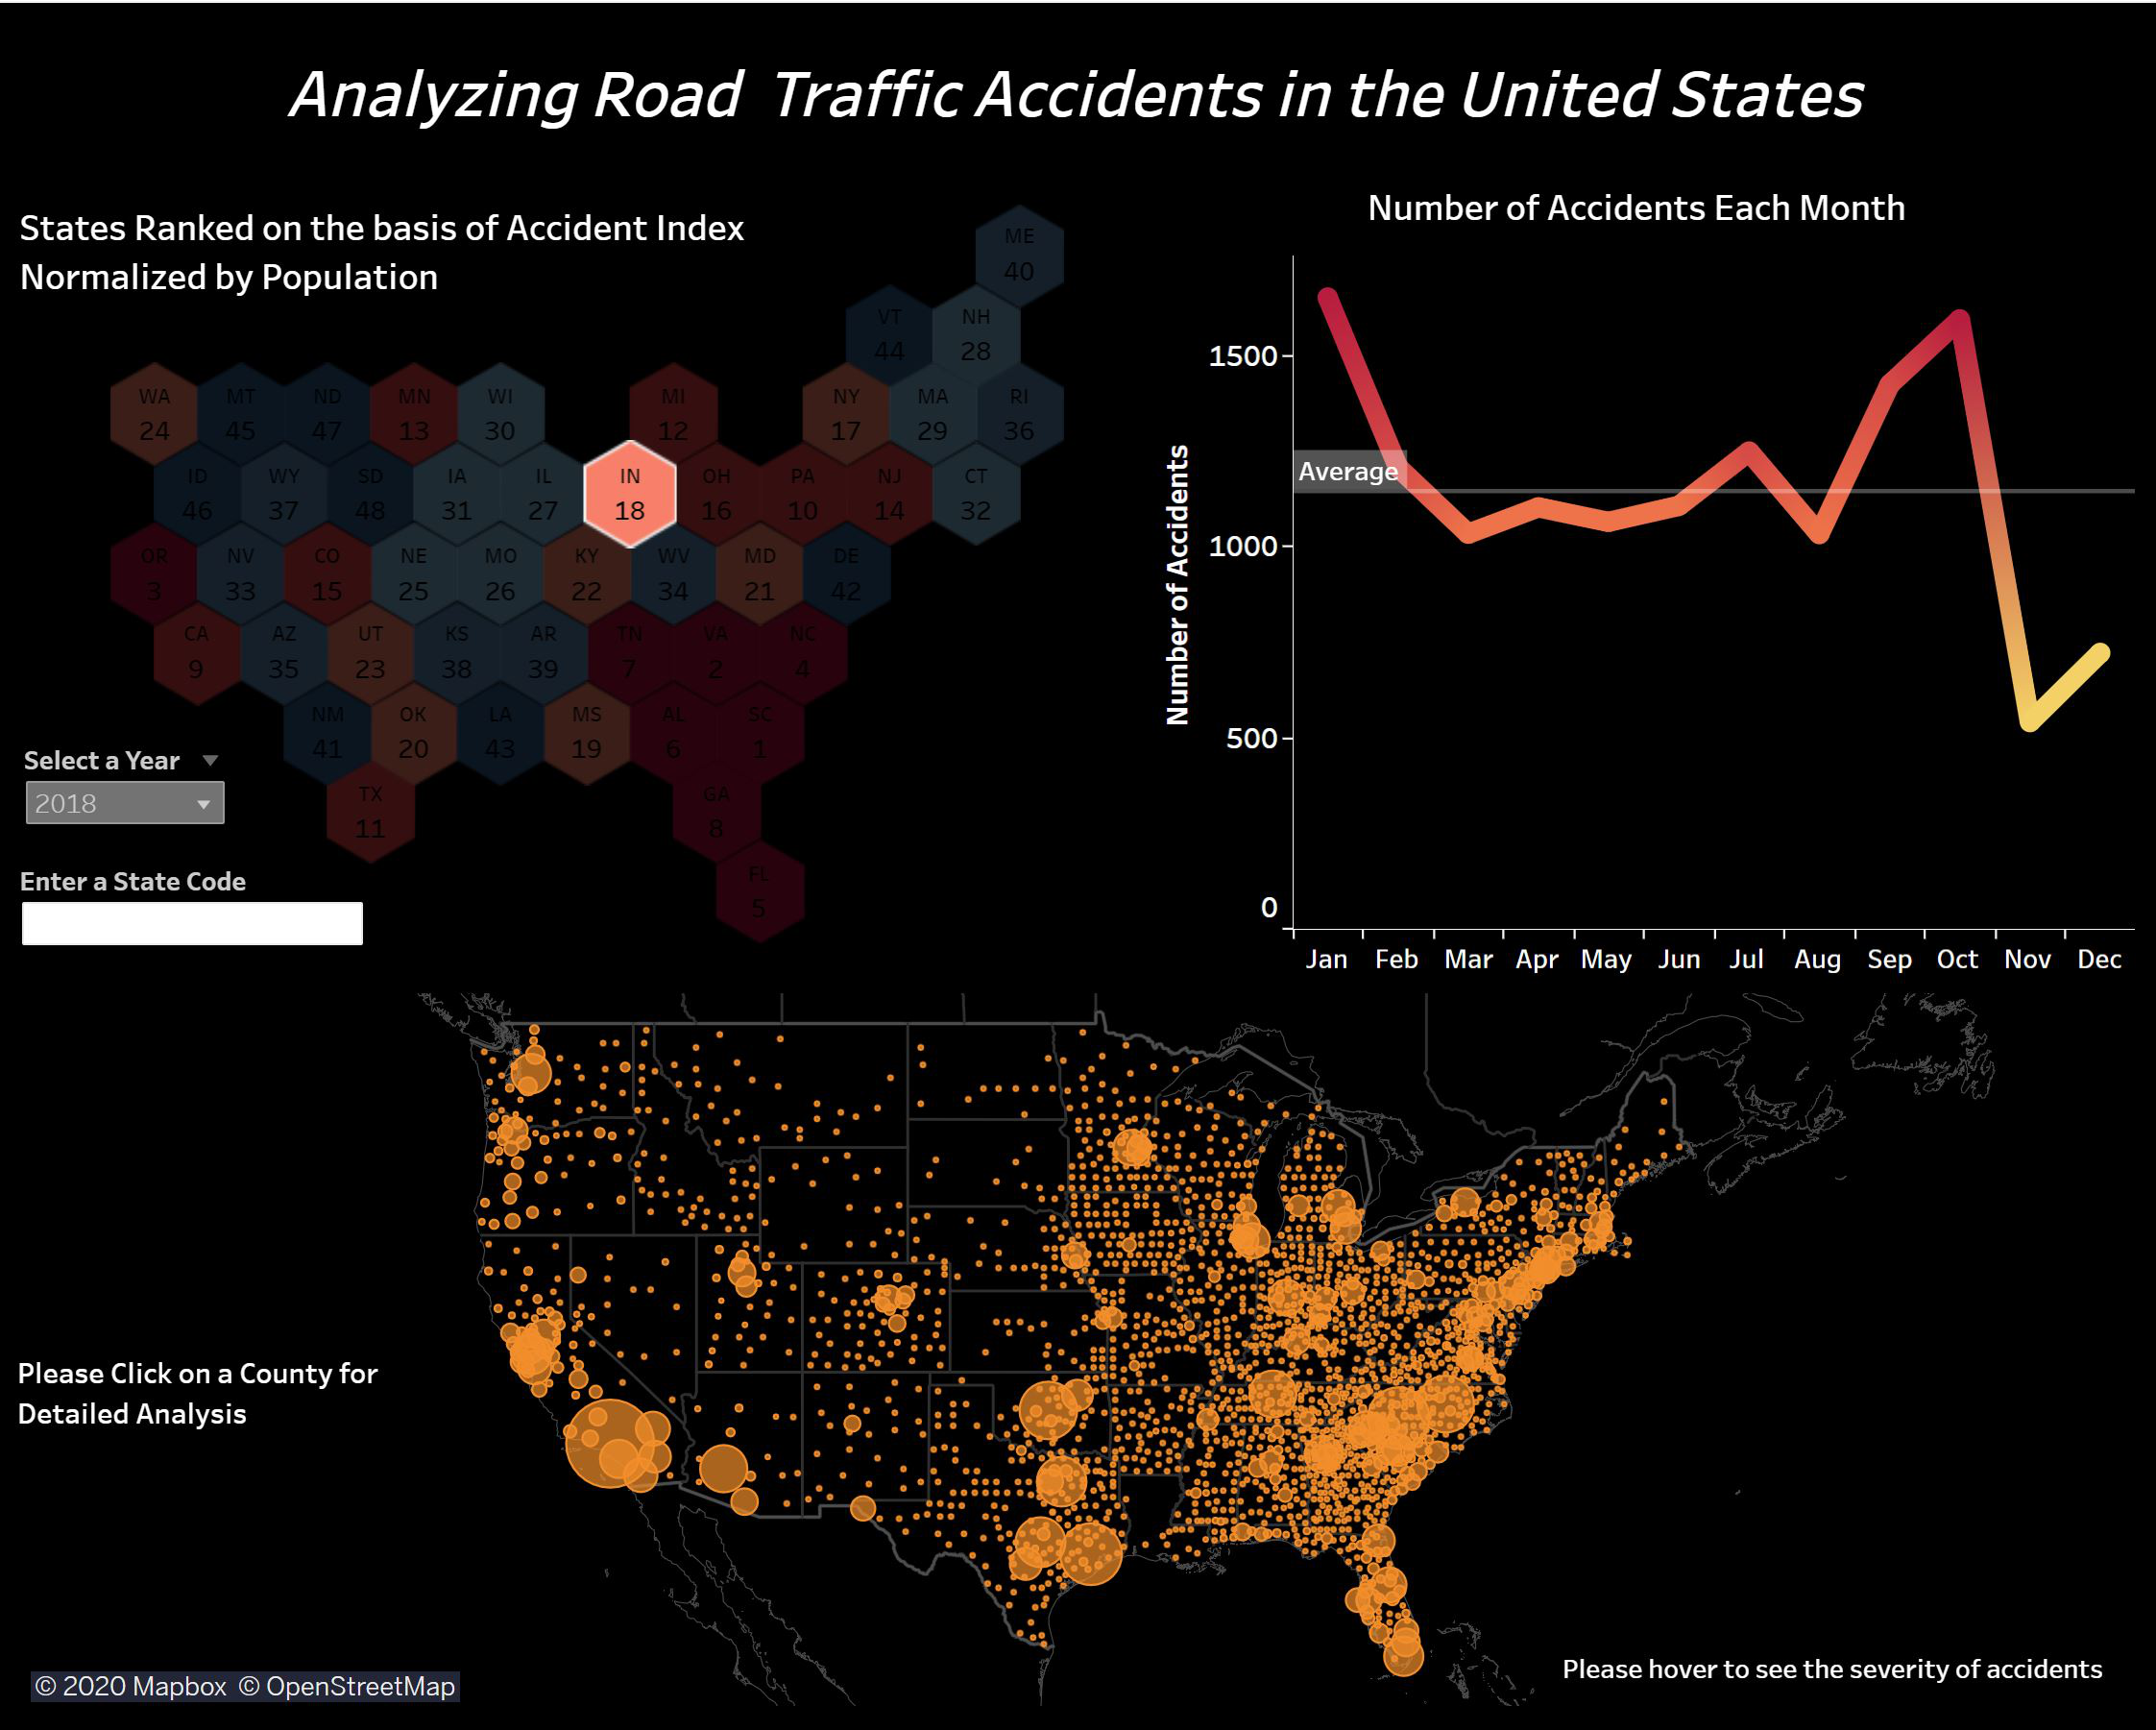

In [57]:
im4 = Image.open('4.JPG')
im4

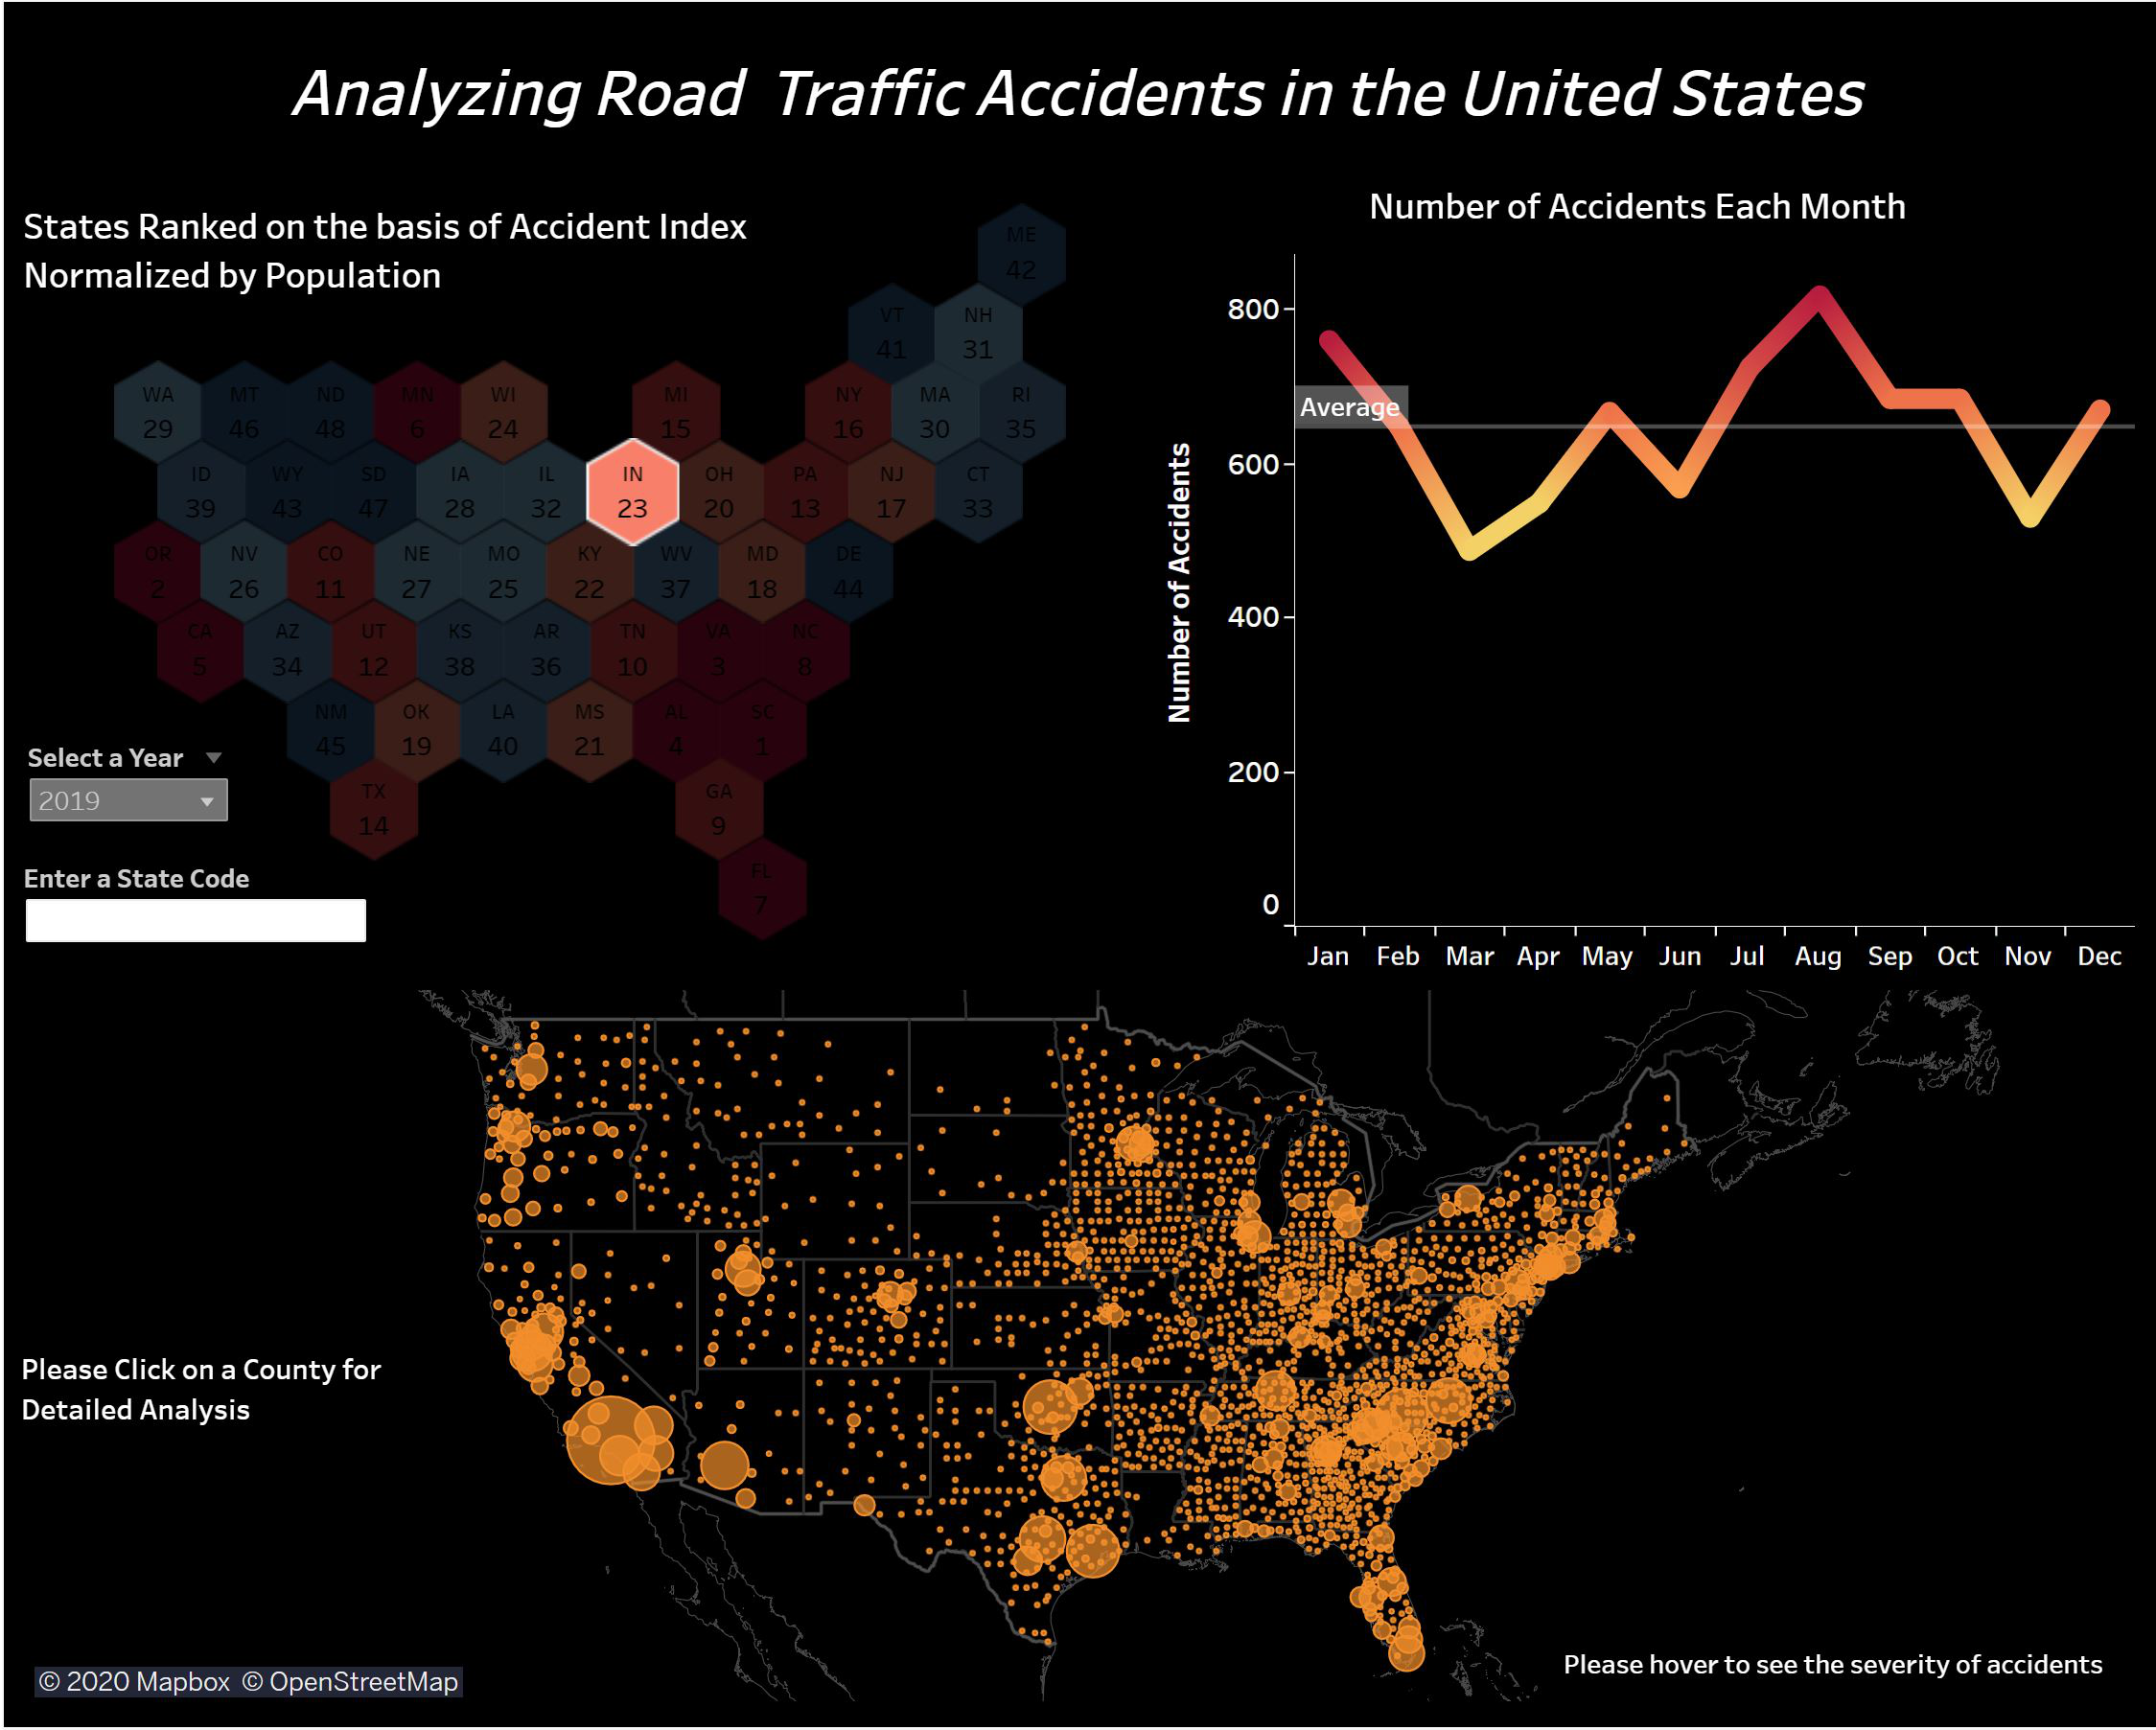

In [58]:
im5 = Image.open('5.JPG')
im5